In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
#pd.core.common.is_list_like = pd.api.types.is_list_like
from SALib.sample import latin, fast_sampler
from SALib.analyze import fast
import json
import matplotlib.pyplot as plt
import init_objects
from functions.helpers import organise_data, confidence_interval
from functions.sensitivity_an import simulate_params_efast
from model import *
from matplotlib import style
from SALib.sample import latin
import scipy.stats as stats
import statsmodels.api as sm
import math

In [4]:
style.use('seaborn-ticks')

# Sensitivity analysis 
Using the eFast method.

Measure the influence of uncertain parameters on real gini, real palma, profits, and volatility

In [47]:
problem = {
  'num_vars': 3,
  'names': ['std_noise', "w_random", "strat_share_chartists"],
  'bounds': [[0.03, 0.09], [0.02, 0.15], [0.2, 0.9]]
}

In [50]:
param_values = fast_sampler.sample(problem, N=65)
#param_values = latin.sample(problem, N=20)
all_parameters = []
for parameters in param_values:
    pars = {}
    for key, value in zip(problem['names'], parameters):
        pars[key] = value
    all_parameters.append(pars)
    
fixed_parameters = {"trader_sample_size": 10,
          "n_traders": 1000,
          "init_stocks": 81,
          "ticks": 1000,
          "fundamental_value": 1134.60,
          "base_risk_aversion": 0.7,
          'spread_max': 0.004087,
          "horizon": 214,
          # Not modelled parameters
          "fundamentalist_horizon_multiplier": 1.0
         }

In [12]:
#len(all_parameters)

20

In [51]:
gini_avs, real_gini_avs, palma_avs, real_palma_avs, av_profits, av_volatilities = simulate_params_efast(NRUNS=2, parameter_set=all_parameters, fixed_parameters=fixed_parameters)

Start of simulation  0
last mid-price was:  1192.0110334253668
Start of simulation  1
last mid-price was:  1241.7306063089195
Start of simulation  0
last mid-price was:  1157.543535910174
Start of simulation  1
last mid-price was:  1298.0626577403198
Start of simulation  0
last mid-price was:  1129.6042416683622
Start of simulation  1
last mid-price was:  1191.065405438641
Start of simulation  0
last mid-price was:  1135.308124589716
Start of simulation  1
last mid-price was:  1184.8075913038351
Start of simulation  0
last mid-price was:  1151.2636265084798
Start of simulation  1
last mid-price was:  1219.8688188689666
Start of simulation  0
last mid-price was:  1145.5074980142047
Start of simulation  1
last mid-price was:  1240.6020625734614
Start of simulation  0
last mid-price was:  1171.5569501955565
Start of simulation  1
last mid-price was:  1290.1353189184947
Start of simulation  0
last mid-price was:  1121.0904243340615
Start of simulation  1
last mid-price was:  1203.740536151

Start of simulation  1
last mid-price was:  1170.5988282074918
Start of simulation  0
last mid-price was:  1132.6453634069362
Start of simulation  1
last mid-price was:  1159.8969794755803
Start of simulation  0
last mid-price was:  1141.041275827688
Start of simulation  1
last mid-price was:  1150.2842705426704
Start of simulation  0
last mid-price was:  1145.3854092725755
Start of simulation  1
last mid-price was:  1173.304755877519
Start of simulation  0
last mid-price was:  1134.275637096131
Start of simulation  1
last mid-price was:  1173.7864397653448
Start of simulation  0
last mid-price was:  1135.2832659782844
Start of simulation  1
last mid-price was:  1201.491591390915
Start of simulation  0
last mid-price was:  1139.078619229186
Start of simulation  1
last mid-price was:  1194.819561436218
Start of simulation  0
last mid-price was:  1136.2373537082412
Start of simulation  1
last mid-price was:  1177.9337044080744
Start of simulation  0
last mid-price was:  1140.032963311174

Start of simulation  0
last mid-price was:  1152.0065663177818
Start of simulation  1
last mid-price was:  1245.9235236825805
Start of simulation  0
last mid-price was:  1181.4011786747155
Start of simulation  1
last mid-price was:  1265.006700371046
Start of simulation  0
last mid-price was:  1140.7650614099948
Start of simulation  1
last mid-price was:  1254.921513381621
Start of simulation  0
last mid-price was:  1137.4564139479144
Start of simulation  1
last mid-price was:  1218.1290324226666
Start of simulation  0
last mid-price was:  1167.2176549014052
Start of simulation  1
last mid-price was:  1220.6166107717527
Start of simulation  0
last mid-price was:  1144.5406546512847
Start of simulation  1
last mid-price was:  1262.5404970302857
Start of simulation  0
last mid-price was:  1140.0875600991353
Start of simulation  1
last mid-price was:  1233.88286433832
Start of simulation  0
last mid-price was:  1310.430497881566
Start of simulation  1
last mid-price was:  1102.01422331468

In [52]:
np.mean(real_gini_avs)

0.24098491820850226

In [18]:
confidence_interval(gini_avs, np.mean(gini_avs))

(0.23547299821183076, 0.23666311809323365)

In [53]:
all_parameters[0]

{'std_noise': 0.08145471314839615,
 'w_random': 0.131485211821525,
 'strat_share_chartists': 0.8003049867312886}

In [54]:
std_noises = [all_parameters[idx]['std_noise'] for idx in range(len(all_parameters))]
w_randoms = [all_parameters[idx]['w_random'] for idx in range(len(all_parameters))]
share_chartists = [all_parameters[idx]['strat_share_chartists'] for idx in range(len(all_parameters))]

In [55]:
sensi = pd.DataFrame(zip(gini_avs, real_gini_avs, real_palma_avs, std_noises, w_randoms, share_chartists), 
             columns=['market_gini', 'real_gini', 'real_palma', 'std_noise', 'w_random', 'strat_share_chartists'])

## Scatterplots

### Real gini

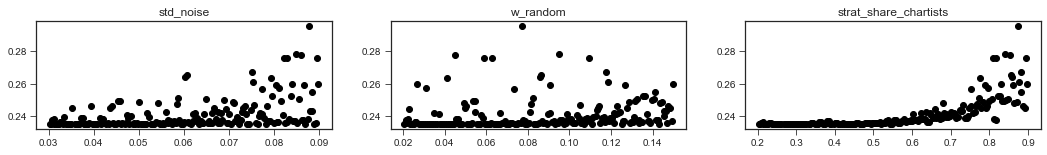

In [56]:
fig, axes = plt.subplots(1, len(problem['names']), figsize=(18,2))

for i, name in enumerate(problem['names']):
    axes[i].plot(sensi[name], sensi['real_gini'], 'o', color='black')
    axes[i].set_title(name)

### Market gini

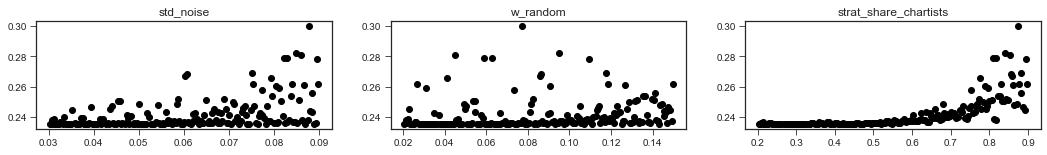

In [57]:
fig, axes = plt.subplots(1, len(problem['names']), figsize=(18,2))

for i, name in enumerate(problem['names']):
    axes[i].plot(sensi[name], sensi['market_gini'], 'o', color='black')
    axes[i].set_title(name)

### Real palma

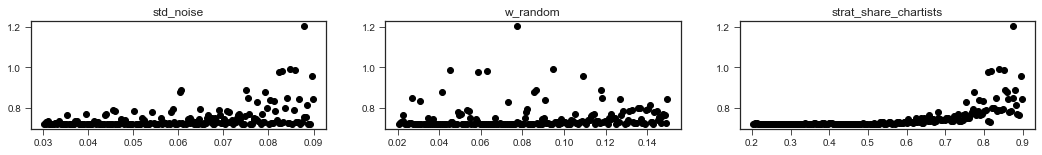

In [58]:
fig, axes = plt.subplots(1, len(problem['names']), figsize=(18,2))

for i, name in enumerate(problem['names']):
    axes[i].plot(sensi[name], sensi['real_palma'], 'o', color='black')
    axes[i].set_title(name)

In [59]:
problem

{'num_vars': 3,
 'names': ['std_noise', 'w_random', 'strat_share_chartists'],
 'bounds': [[0.03, 0.09], [0.02, 0.15], [0.2, 0.9]]}

In [60]:
impact_on_gini = fast.analyze(problem, np.array(gini_avs), print_to_console=False)
impact_on_real_gini = fast.analyze(problem, np.array(real_gini_avs), print_to_console=False)
impact_on_palma = fast.analyze(problem, np.array(palma_avs), print_to_console=False)
impact_on_real_palma = fast.analyze(problem, np.array(real_palma_avs), print_to_console=False)
impact_on_vol = fast.analyze(problem, np.array(av_volatilities), print_to_console=False)
impact_on_profits = fast.analyze(problem, np.array(av_profits), print_to_console=False)

In [36]:
#from SALib.test_functions import Ishigami

In [44]:
fast.analyze(problem, Y)

{'S1': [0.12834547520950051, 0.8687506397583096, 6.246030158082598e-05],
 'ST': [0.12864882977197667, 0.8711096479187483, 0.0025689574935117143],
 'names': ['std_noise', 'w_random', 'strat_share_chartists']}

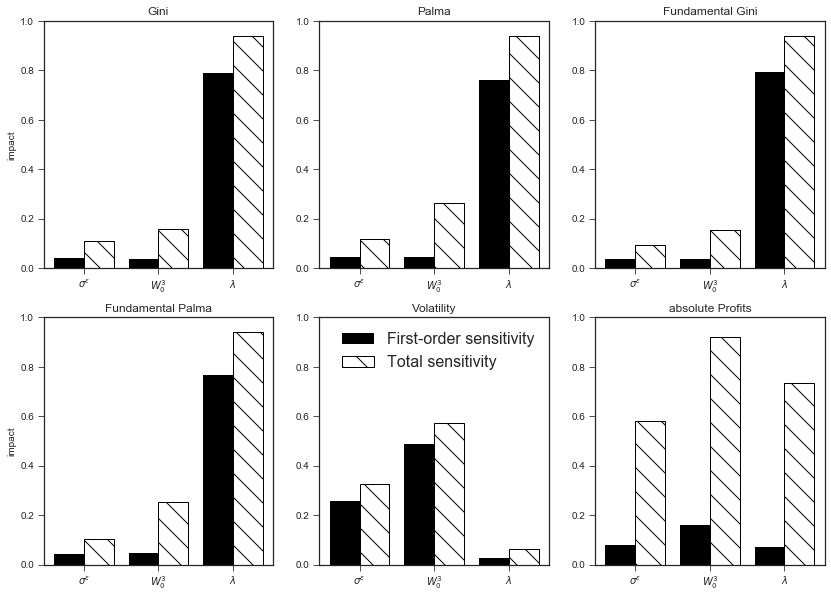

In [77]:
# plot 6 histograms 
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))

N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.40       # the width of the bars

ax1 = axes[0,0] 
ax2 = axes[0,1]
ax3 = axes[0,2]
ax4 = axes[1,0]
ax5 = axes[1,1]
ax6 = axes[1,2]

ax1.set_title('Gini')
rects1 = ax1.bar(ind, impact_on_gini['S1'], width, color='k')
rects2 = ax1.bar(ind + width, impact_on_gini['ST'], width, edgecolor='k', color='w', hatch='\\')
ax1.set_ylabel('impact')

ax2.set_title('Palma')
rects3 = ax2.bar(ind, impact_on_palma['S1'], width, color='k')
rects4 = ax2.bar(ind + width, impact_on_palma['ST'], width,edgecolor='k', color='w', hatch='\\')

ax3.set_title('Fundamental Gini')
rects5 = ax3.bar(ind, impact_on_real_gini['S1'], width, color='k')
rects6 = ax3.bar(ind + width, impact_on_real_gini['ST'], width, edgecolor='k',color='w', hatch='\\')

ax4.set_title('Fundamental Palma')
rects7 = ax4.bar(ind, impact_on_real_palma['S1'], width, color='k')
rects8 = ax4.bar(ind + width, impact_on_real_palma['ST'], width,edgecolor='k', color='w', hatch='\\')
ax4.set_ylabel('impact')

ax5.set_title('Volatility')
rects9 = ax5.bar(ind, impact_on_vol['S1'], width, color='k')
rects10 = ax5.bar(ind + width, impact_on_vol['ST'], width,edgecolor='k', color='w', hatch='\\')

ax6.set_title('absolute Profits')
rects11 = ax6.bar(ind, impact_on_profits['S1'], width, color='k')
rects12 = ax6.bar(ind + width, impact_on_profits['ST'], width,edgecolor='k', color='w', hatch='\\')
#ax6.legend((rects11[0], rects12[0]), ('First-order sensitivity', 'Total sensitivity'), 
 #          loc='center left', bbox_to_anchor=(1.25, 0.5))

ax5.legend((rects11[0], rects12[0]), ('First-order sensitivity', 'Total sensitivity'), fontsize=16) 
    
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(('$\sigma^{\epsilon}$', "$W^{3}_0$", "$\lambda$")) 
    ax.set_ylim(0, 1.0)
    
fig.savefig('eFastExpectations.png')